## 음원의 주파수 변환

In [5]:
import librosa
import numpy as np
import librosa.display
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [6]:
y, sr = librosa.load('./sample.wav')

In [7]:
y

array([-0.00134927, -0.00212309, -0.00285413, ..., -0.01340944,
       -0.0069214 ,  0.        ], dtype=float32)

In [8]:
sr

22050

- y는 해당 샘플링 시간의 음원의 크기 (amplitude)
- sr은 샘플링 주파수, 위에서는 22kHz

### 직접 시간 영역에서의 음원 파형 그리기

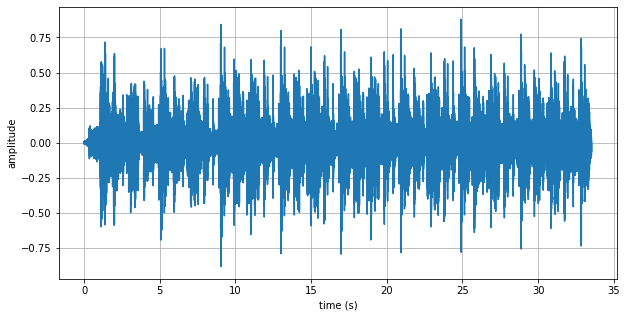

In [9]:
t = np.arange(0, len(y)) / sr

plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

- 직접 그리고 싶다면 시간축을 y의 개수와 샘플링 주파수를 이용해서 만들어서 그림

### librosa의 waveshow(waveplot)으로 그림

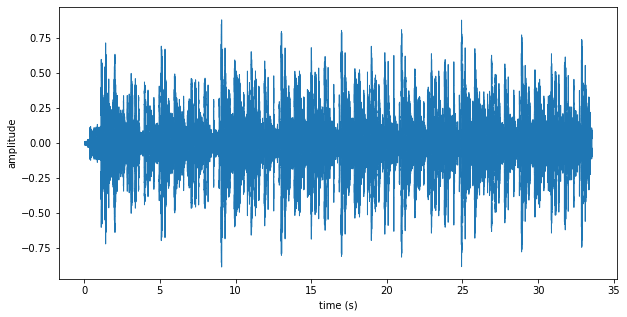

In [13]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y=y, sr=sr)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

### 주파수 분석이란
- 시간 영역의 신호를 다양한 주파수의 신호의 합성으로 보고 이를 찾는 것

### numpy가 제공하는 fft를 이용해 위 결과를 주파수 분석 후 그림

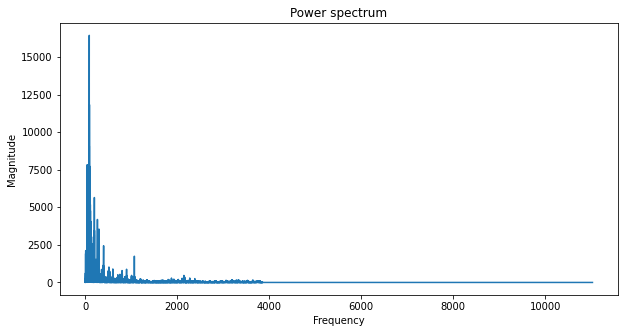

In [14]:
fft = np.fft.fft(y)
magnitude = np.abs(fft)

f = np.linspace(0, sr, len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_f = f[:int(len(magnitude) / 2)]

plt.figure(figsize=(10, 5))
plt.plot(left_f, left_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.show()

### 주파수 변환 결과 그림
- 각 주파수 대역별로 크기를 바로 feature로 사용

### 2kHz 대역까지만 그리자

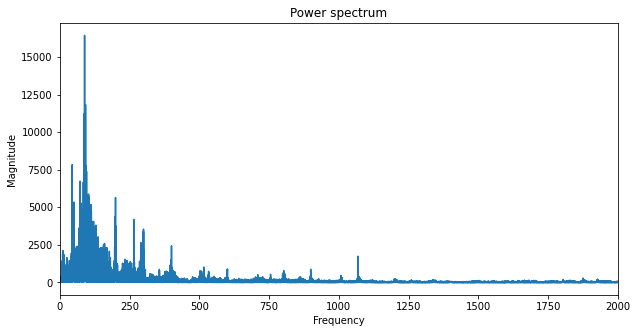

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(left_f, left_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.xlim([0, 2000])
plt.show()

### librosa의 stft를 이용해서 그림

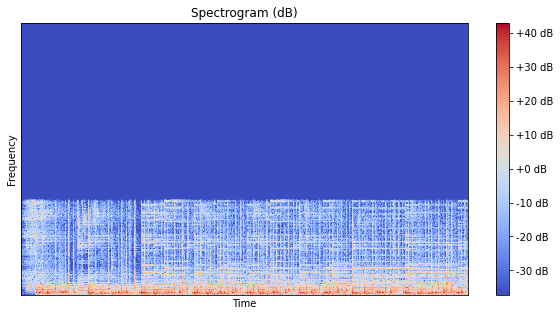

In [16]:
hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10, 5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.show()

### 시간영역과 주파수영역의 결과 비교

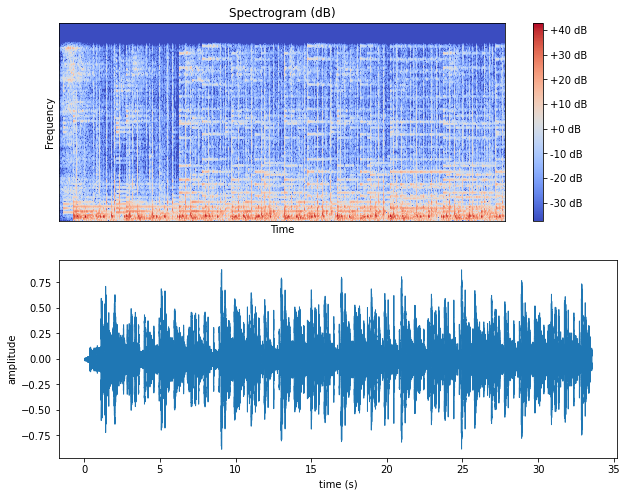

In [18]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim([0, 200])
plt.title('Spectrogram (dB)')
plt.colorbar(format='%+2.0f dB')
ax2 = fig.add_subplot(2, 1, 2)
librosa.display.waveshow(y=y, sr=sr)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

### Mel Spectrum
- 사람의 청각은 고주파로 갈수록 구분하는 간격이 넓어짐
- 이를 이용하여 스케일을 변화함

### mel spec 확인

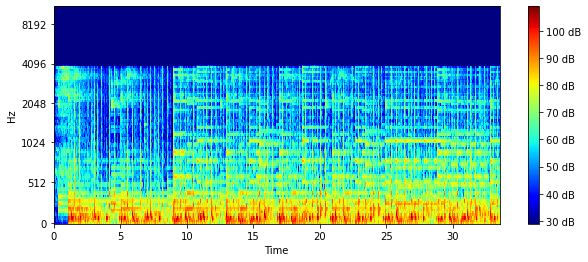

In [20]:
win_length = 1024
n_mels = 128
D = np.abs(librosa.stft(y,
                        n_fft=n_fft,
                        win_length=win_length,
                        hop_length=hop_length))
mel_spec = librosa.feature.melspectrogram(S=D,
                                          sr=sr,
                                          n_mels=n_mels,
                                          hop_length=hop_length,
                                          win_length=win_length)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(mel_spec,
                                                 ref=0.00002),
                         sr=sr,
                         hop_length=hop_length,
                         y_axis='mel',
                         x_axis='time',
                         cmap=cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()